In [44]:
from googlesearch import search
from collections import defaultdict
import urllib.request 
from bs4 import BeautifulSoup
from afinn import Afinn
from nltk.tokenize import word_tokenize,sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = input('enter movie name')
query = movie + 'user review'
print(query)

for j in search(query, tld = 'co.in', num = 40, stop = 2, pause = 2):
    print(j)
    
response = urllib.request.urlopen(j)
html = response.read()
soup = BeautifulSoup(html,'lxml')

text = soup
print(text)


enter movie namedeadpool
deadpooluser review
https://www.metacritic.com/movie/deadpool/user-reviews/
https://www.imdb.com/title/tt1431045/reviews
<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Deadpool (2016) - Deadpool (2016) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="htt

In [3]:
text.prettify()    

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n <head>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <title>\n   Deadpool (2016) - Deadpool (2016) - User Reviews - IMDb\n  </title>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <link href="https://www.imdb.com/title/tt1431045/reviews" rel="canonica

In [4]:
k = text.find_all('div',class_="text show-more__control")

In [6]:
reviews = []
for i in k:
    reviews.append(i.text)

In [8]:
len(reviews)


25

In [9]:
l = []
import emoji
for i in reviews:
    l.append(emoji.demojize(i))

In [12]:
df = pd.DataFrame(reviews)


In [13]:
df.rename(columns = {0:'reviews'},inplace = True)

In [68]:
positive = []
negative = []
neutral = []
afinn = Afinn()
for i in df['reviews']:
    tokens = (sent_tokenize(i))
    
    for token in tokens:

        if afinn.score(token) > 0:
            positive.append(token)
        elif afinn.score(token) < 0:
            negative.append(token)
        else:
            neutral.append(token)

    print('Positive sent :',positive)
    print('\t\n')
    print('Negative sent :',negative)
    print('\t\n')
    print('Neutral sent :',neutral)
    print('\t\n')

Positive sent : ['"Deadpool" is absolutely hilarious.', 'The greatness of this film lies in its humor and its uniqueness.', "It isn't like every other superhero film.", "The humor won't appeal to everyone either.", 'Sure, "Deadpool" isn\'t for everyone, but to the right audience, it\'s a masterpiece.', 'The humor is great and there are countless hilarious jokes throughout that will make you laugh.', 'Ryan Reynolds is perfect for Deadpool and he does so well in the role.', 'It is a truly great performance by him.To sum up, "Deadpool" is a great film that might not be for everyone.', 'I recommend it.']
	

Negative sent : ["The story isn't groundbreaking, but it does the trick and the same goes for the action which isn't bad either.", "It's very crude and it's filled with nudity and violence."]
	

Neutral sent : ['Whether you talk about the constant breaking of the fourth wall, the R-rating, or any of the very different characteristics of this film that differentiate it from other superhe

Positive sent : ['"Deadpool" is absolutely hilarious.', 'The greatness of this film lies in its humor and its uniqueness.', "It isn't like every other superhero film.", "The humor won't appeal to everyone either.", 'Sure, "Deadpool" isn\'t for everyone, but to the right audience, it\'s a masterpiece.', 'The humor is great and there are countless hilarious jokes throughout that will make you laugh.', 'Ryan Reynolds is perfect for Deadpool and he does so well in the role.', 'It is a truly great performance by him.To sum up, "Deadpool" is a great film that might not be for everyone.', 'I recommend it.', 'One of the greatest anti-hero - the Merc with a mouth - Wade Wilson was once a special forces operative but turned mercenary.', "Armed with weapons (and a wicked sense of humour) he will stop at nothing to track down the men responsible.Never have I seen so many fans (or moviegoers), dying to see a character like Deadpool on the big screen; it's a bit like how everyone wanted to see The A

Positive sent : ['"Deadpool" is absolutely hilarious.', 'The greatness of this film lies in its humor and its uniqueness.', "It isn't like every other superhero film.", "The humor won't appeal to everyone either.", 'Sure, "Deadpool" isn\'t for everyone, but to the right audience, it\'s a masterpiece.', 'The humor is great and there are countless hilarious jokes throughout that will make you laugh.', 'Ryan Reynolds is perfect for Deadpool and he does so well in the role.', 'It is a truly great performance by him.To sum up, "Deadpool" is a great film that might not be for everyone.', 'I recommend it.', 'One of the greatest anti-hero - the Merc with a mouth - Wade Wilson was once a special forces operative but turned mercenary.', "Armed with weapons (and a wicked sense of humour) he will stop at nothing to track down the men responsible.Never have I seen so many fans (or moviegoers), dying to see a character like Deadpool on the big screen; it's a bit like how everyone wanted to see The A

In [36]:
Positive_reviews = pd.DataFrame(positive)


In [38]:
Negative_reviews = pd.DataFrame(negative)

In [39]:
Neutral_reviews = pd.DataFrame(neutral)

In [52]:
n = len(Negative_reviews)
p = len(Positive_reviews)
ne = len(Neutral_reviews)

In [53]:
name = ['Positive','Negative','Neutral']
rev = [p,n,ne]

In [60]:
def addgraph(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],y[i],ha = 'center',va = 'bottom')

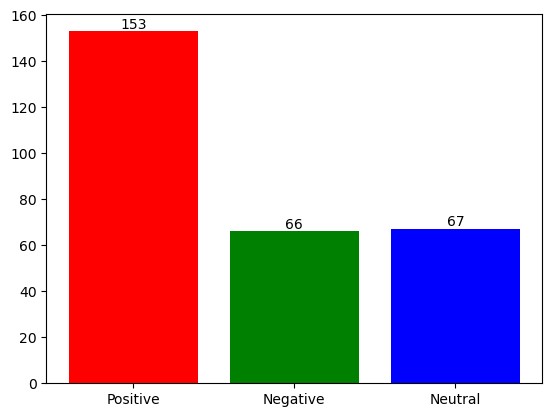

In [61]:
plt.bar(name,rev,color = ['red','green','blue'])
addgraph(name,rev)

3.0
